### Coding Challenge From SiraJ - Gradient Descent

This notebook is for the coding challenge from SiraJ new series "Math of Intelligence" week1 gradient descent.

Dataset is from Kaggle House Sales in King County, USA 
https://www.kaggle.com/harlfoxem/housesalesprediction

I will use Numpy and Pandas to implement "Stochastic Gradient".

Refere to http://sebastianruder.com/optimizing-gradient-descent/index.html

In [58]:
# load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# load data
house_data = pd.read_csv("kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


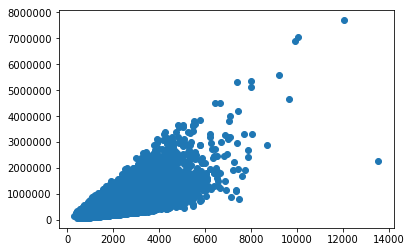

In [60]:
# we will only use 2 variables from this dataset which is "sqft_living" as X and "price" as Y
# plot the data and check the correlation. we can see that there is correlation between "sqft_living" and "price".
# we can calculate gradient to find regression fit line.
plt.scatter(house_data["sqft_living"].get_values(), house_data["price"].get_values())

### Stochastic gradient descent

There are 2 things need to be noted:

1.since the "sqft_living" and "price" value are in different scale, need to normalize before running gradient descent, otherwise it will cause learning failed result by infinity number.

2.init_m and init_b are be careful, it maybe result in local minima.

In [61]:
# y = mx + b
# m is slope, b is y-intercept
# compute Mean Squared Error
def compute_error_for_given_data(m, b, X, Y):
    n = len(X)
    _Y = m*X + b
    errors = 1/n * sum((Y-_Y)**2)
    return errors

In [62]:
def step_stachastic_gradient(cur_m, cur_b, X, Y, learning_rate):
    n = len(X)
    new_m = cur_m
    new_b = cur_b
    m_gradient = 0
    b_gradient = 0
    for x, y in zip(X, Y):
        m_gradient = -2/n * (y - (new_m*x + new_b)) * x
        b_gradient = -2/n * (y - (new_m*x + new_b))
        new_m = new_m - learning_rate*m_gradient
        new_b = new_b - learning_rate*m_gradient
    return [new_m, new_b]

In [63]:
def gradient_runner(X, Y, starting_m, starting_b, learning_rate, num_iterations):
    errors = []
    m = starting_m
    b = starting_b
    for i in range(num_iterations):
        error = compute_error_for_given_data(m, b, X, Y)
        errors.append(error)
        if i%50==0:
            print("iteration {}/{} (m: {:.4f}, b: {:.4f}) error - {:.4f}".format(i, num_iterations, m, b, error))
        m, b = step_stachastic_gradient(m, b, X, Y, learning_rate)
    return [m, b, errors]

In [64]:
def normalizeData(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std

In [65]:
def plot(X, Y, m, b, color):
    plt.scatter(X, Y)
    plt.plot(X, m*X+b, color=color)

In [ ]:
def run():
    X = normalizeData(house_data["sqft_living"].get_values())
    Y = normalizeData(house_data["price"].get_values())
    init_m = -1
    init_b =-0.2
    plot(X, Y, init_m, init_b, "red")
    
    learning_rate = 0.0005
    num_iterations =1000
    m, b, errors = gradient_runner(X, Y, init_m, init_b, learning_rate, num_iterations)
    plot(X, Y, m, b, "blue")
    
    return errors

In [ ]:
errors = run()

iteration 0/1000 (m: -1.0000, b: -0.2000) error - 3.4441
iteration 50/1000 (m: -0.9170, b: -0.1170) error - 3.1421
iteration 100/1000 (m: -0.8380, b: -0.0380) error - 2.8804
iteration 150/1000 (m: -0.7629, b: 0.0371) error - 2.6546
iteration 200/1000 (m: -0.6915, b: 0.1085) error - 2.4608
iteration 250/1000 (m: -0.6235, b: 0.1765) error - 2.2954
iteration 300/1000 (m: -0.5589, b: 0.2411) error - 2.1552
iteration 350/1000 (m: -0.4974, b: 0.3026) error - 2.0373
iteration 400/1000 (m: -0.4389, b: 0.3611) error - 1.9392
iteration 450/1000 (m: -0.3832, b: 0.4168) error - 1.8587


In [ ]:
# plot errors
plt.plot(errors)